In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from scipy.stats import norm

class linreg():
    def __init__(self):
        self.X = []
        self.Y = []
        self.beta = []
        self.covMatrix = []
        self.t = []
        self.R2 = []
        self.errors = []
        
    @classmethod
    def fit(self):
        self.beta = np.linalg.inv(self.X.T @ self.X) @ (self.X.T @ self.Y)
        if len(self.beta) == 1: 
            self.errors = self.Y - self.X * self.beta
        else: 
            self.errors = self.Y - self.X @ self.beta
            
        sigma_epsilon = np.sqrt(np.var(self.errors,ddof=len(self.beta)))
        self.covMatrix = np.linalg.inv(self.X.T @ self.X) * sigma_epsilon
        self.t = lambda x: (self.beta[x] - 0)/np.sqrt(self.covMatrix[x,x]) # t(0) t-statistic for intercept (beta_0) and t(1) for beta_1 etc
        self.R2 = np.sum([(self.X[i,:] @ self.beta - np.mean(self.Y))**2 for i in range(len(self.X))]) \
                / np.sum([(self.Y[i] - np.mean(self.Y))**2 for i in range(len(self.X))])
    
    @classmethod
    def results(self):
        print("----------------- Linear regression ----------------- \n")
        print("Y_i = X_i*Beta + e_i")
        print("e_i ~ N(0,sigma_{e}^2)\n")
        for i in range(len(self.beta)):
            print('Beta_%i = %0.3f\nt-statistic = %0.3f\np-value = %0.3f\n'%(i,self.beta[i],self.t(i),norm.cdf(-np.abs(self.t(i))/2)))
        print('R2 = %0.3f' % self.R2)
        print("----------------- End Linear regression ----------------- \n")
        

In [3]:
file = '/Users/max/Documents/Econometrie_jaar_4/P3/Data_wrangling/Project/data/temp/GlobalLandTemperaturesByState.csv'
df1 = pd.read_csv(file, parse_dates=True)


In [4]:
df = df1[df1['Country']=='United States']
df.dt = pd.to_datetime(df.dt)
df = df[df.dt > '1992']
df = df[['dt', 'AverageTemperature', 'State']]
display(df)

/Users/max/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,dt,AverageTemperature,State
10437,1992-02-01,10.898,Alabama
10438,1992-03-01,12.995,Alabama
10439,1992-04-01,16.589,Alabama
10440,1992-05-01,20.430,Alabama
10441,1992-06-01,24.305,Alabama
...,...,...,...
626435,2013-05-01,10.607,Wyoming
626436,2013-06-01,16.267,Wyoming
626437,2013-07-01,20.222,Wyoming
626438,2013-08-01,19.621,Wyoming


Dictionary for mapping the american state names to Two-Letter codes. So the temperature data can be merged with the wildfire data.

In [5]:
# United States of America Python Dictionary to translate States,
# Districts & Territories to Two-Letter codes and vice versa.
#
# https://gist.github.com/rogerallen/1583593
#
# Dedicated to the public domain.  To the extent possible under law,
# Roger Allen has waived all copyright and related or neighboring
# rights to this code.
us_state_abbrev = {
'Alabama': 'AL',
'Alaska': 'AK',
'American Samoa': 'AS',
'Arizona': 'AZ',
'Arkansas': 'AR',
'California': 'CA',
'Colorado': 'CO',
'Connecticut': 'CT',
'Delaware': 'DE',
'District of Columbia': 'DC',
'Florida': 'FL',
'Georgia': 'GA',
'Guam': 'GU',
'Hawaii': 'HI',
'Idaho': 'ID',
'Illinois': 'IL',
'Indiana': 'IN',
'Iowa': 'IA',
'Kansas': 'KS',
'Kentucky': 'KY',
'Louisiana': 'LA',
'Maine': 'ME',
'Maryland': 'MD',
'Massachusetts': 'MA',
'Michigan': 'MI',
'Minnesota': 'MN',
'Mississippi': 'MS',
'Missouri': 'MO',
'Montana': 'MT',
'Nebraska': 'NE',
'Nevada': 'NV',
'New Hampshire': 'NH',
'New Jersey': 'NJ',
'New Mexico': 'NM',
'New York': 'NY',
'North Carolina': 'NC',
'North Dakota': 'ND',
'Northern Mariana Islands':'MP',
'Ohio': 'OH',
'Oklahoma': 'OK',
'Oregon': 'OR',
'Pennsylvania': 'PA',
'Puerto Rico': 'PR',
'Rhode Island': 'RI',
'South Carolina': 'SC',
'South Dakota': 'SD',
'Tennessee': 'TN',
'Texas': 'TX',
'Utah': 'UT',
'Vermont': 'VT',
'Virgin Islands': 'VI',
'Virginia': 'VA',
'Washington': 'WA',
'West Virginia': 'WV',
'Wisconsin': 'WI',
'Wyoming': 'WY'
}
df['State'] = df['State'].map(us_state_abbrev)
display(df)

,dt,AverageTemperature,State
10437,1992-02-01,10.898,AL
10438,1992-03-01,12.995,AL
10439,1992-04-01,16.589,AL
10440,1992-05-01,20.430,AL
10441,1992-06-01,24.305,AL
...,...,...,...
626435,2013-05-01,10.607,WY
626436,2013-06-01,16.267,WY
626437,2013-07-01,20.222,WY
626438,2013-08-01,19.621,WY


In [6]:
# import sqlite3

# # # Read sqlite query results into a pandas DataFrame
# file = '/Users/max/Documents/Econometrie_jaar_4/P3/Data_wrangling/Project/data/wildfires/FPA_FOD_20170508.sqlite'
# con = sqlite3.connect(file)
# df = pd.read_sql_query("SELECT * FROM fires", con)
# con.close()
# Verify that result of SQL query is stored in the dataframe
# Write dataframe obtained from sql query to a csv file
# df.to_csv('/Users/max/Documents/Econometrie_jaar_4/P3/Data_wrangling/Project/data/wildfires/wildfires.csv')


#### Weather data
## Average monthly temperature data per state in US 
# import requests

# csv_url = 'https://www.ncdc.noaa.gov/cag/divisional/mapping/110-tavg.csv'
# req = requests.get(csv_url)
# url_content = req.content
# csv_file = open('tempavg.csv', 'wb')
# csv_file.write(url_content)
# csv_file.close()

## Palmer Z-Index for capturing monthly short term drought
## Information for Palmer Z-Index https://www.ncdc.noaa.gov/temp-and-precip/drought/historical-palmers/overview
# csv_url = 'https://www.ncdc.noaa.gov/cag/divisional/mapping/110-zndx.csv'
# req = requests.get(csv_url)
# url_content = req.content
# csv_file = open('PZI.csv', 'wb')
# csv_file.write(url_content)
# csv_file.close()

In [7]:
dfWild = pd.read_csv('/Users/max/Documents/Econometrie_jaar_4/P3/Data_wrangling/Project/data/wildfires/wildfires.csv',\
                     parse_dates=True)
display(dfWild.columns.values)
dfWild['DATE_DISCOVERY'] = pd.to_datetime(dfWild['FIRE_YEAR'] * 1000 + dfWild['DISCOVERY_DOY'], format='%Y%j')
dfWild = dfWild[['DATE_DISCOVERY','STAT_CAUSE_DESCR','FIRE_SIZE','FIRE_SIZE_CLASS','STATE','LATITUDE','LONGITUDE']]
dfWild = dfWild.sort_values(by=['STATE','DATE_DISCOVERY'])

/Users/max/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9,11,12,13,14,15,16,17,18,19,36,38) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


array(['Unnamed: 0', 'OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE',
       'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID',
       'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE',
       'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE',
       'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_CODE',
       'FIPS_NAME', 'Shape'], dtype=object)

In [8]:
display(dfWild)

,DATE_DISCOVERY,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,STATE,LATITUDE,LONGITUDE
1361966,1992-04-04,Smoking,0.10,A,AK,64.833335,-147.516662
1361967,1992-04-06,Miscellaneous,0.10,A,AK,61.666667,-149.433334
1361968,1992-04-07,Smoking,0.10,A,AK,61.566665,-149.350006
1361945,1992-04-20,Debris Burning,0.30,B,AK,61.566665,-149.083328
210328,1992-04-21,Structure,0.10,A,AK,64.349600,-147.369000
...,...,...,...,...,...,...,...
1808353,2015-12-04,Fireworks,0.25,A,WY,42.815900,-106.281000
1829530,2015-12-05,Debris Burning,1.00,B,WY,42.821600,-106.378900
1792586,2015-12-08,Miscellaneous,40.00,C,WY,42.206111,-105.264167
1817808,2015-12-12,Campfire,0.10,A,WY,42.773100,-106.354700


In [25]:
file = './data/temp/tempavg.csv'
dftemp = pd.read_csv(file, error_bad_lines=False,skiprows=range(3))
dftemp = dftemp.rename(columns={'Value':'TEMP'})
dftemp.TEMP = dftemp.TEMP.apply(lambda x: (x-32)*5/9)
dftemp.Date = pd.to_datetime(dftemp.Date, format='%Y%m')
dftemp = dftemp[(dftemp.Date >= '1991-01-01') & (dftemp.Date < '2016-01-01')]

file = './data/temp/PZI.csv'
dfPalmerZ = pd.read_csv(file, error_bad_lines=False, skiprows=range(2))
dfPalmerZ = dfPalmerZ.rename(columns={'Value':'PALMZ'})
dfPalmerZ.Date = pd.to_datetime(dfPalmerZ.Date, format='%Y%m')
dfPalmerZ = dfPalmerZ[(dfPalmerZ.Date >= '1991-01-01') & (dfPalmerZ.Date < '2016-01-01')]

In [29]:
import re

def extractState(text):
    pattern = r'(.+)\sCD'
    regex = re.compile(pattern, flags=re.IGNORECASE)
    state = regex.match(text).groups()[0]
    TwoLetterState = us_state_abbrev[state]
    return TwoLetterState

dftemp['State'] = dftemp.Location.apply(extractState)
dftemp = dftemp.drop(columns=['Location','Anomaly (1901-2000 base period)'])


dfPalmerZ['State'] = dfPalmerZ.Location.apply(extractState)
dfPalmerZ = dfPalmerZ.drop(columns=['Location','Anomaly (1901-2000 base period)'])

Create rolling window mean for x months average temperature or x months average palmerZ-index

In [30]:
dftemp = pd.DataFrame(dftemp.groupby(['State','Date'], as_index=False)['TEMP'].mean())

dfPalmerZ = pd.DataFrame(dfPalmerZ.groupby(['State','Date'], as_index=False)['PALMZ'].mean())

# Collumns containing the previous x month average temperature 
months = range(2,13)
for i in months:
    month = i
    dftemp.loc[:, f'{month}MavgTemp'] = dftemp['TEMP'].rolling(month).mean()
    dfPalmerZ.loc[:, f'{month}MavgPalmZ'] = dfPalmerZ['PALMZ'].rolling(month).mean()

In [31]:
display(dfPalmerZ, dftemp)

,State,Date,PALMZ,2MavgPalmZ,3MavgPalmZ,4MavgPalmZ,5MavgPalmZ,6MavgPalmZ,7MavgPalmZ,8MavgPalmZ,9MavgPalmZ,10MavgPalmZ,11MavgPalmZ,12MavgPalmZ
0,AL,1991-01-01,1.27875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,1991-02-01,0.08125,0.680000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AL,1991-03-01,0.27250,0.176875,0.544167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL,1991-04-01,1.41125,0.841875,0.588333,0.760938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,1991-05-01,4.39000,2.900625,2.024583,1.538750,1.48675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14395,WY,2015-08-01,0.63000,1.116000,0.831000,1.802000,1.20880,0.502667,0.460143,0.314500,0.393444,0.4579,0.266000,0.385250
14396,WY,2015-09-01,-1.77700,-0.573500,0.151667,0.179000,1.08620,0.711167,0.177000,0.180500,0.082111,0.1764,0.254727,0.095750
14397,WY,2015-10-01,-0.85800,-1.317500,-0.668333,-0.100750,-0.02840,0.762167,0.487000,0.047625,0.065111,-0.0119,0.082364,0.162000
14398,WY,2015-11-01,-0.04600,-0.452000,-0.893667,-0.512750,-0.08980,-0.031333,0.646714,0.420375,0.037222,0.0540,-0.015000,0.071667


,State,Date,TEMP,2MavgTemp,3MavgTemp,4MavgTemp,5MavgTemp,6MavgTemp,7MavgTemp,8MavgTemp,9MavgTemp,10MavgTemp,11MavgTemp,12MavgTemp
0,AL,1991-01-01,7.409722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,1991-02-01,9.979167,8.694444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AL,1991-03-01,13.583333,11.781250,10.324074,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL,1991-04-01,18.569444,16.076389,14.043981,12.385417,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,1991-05-01,22.750000,20.659722,18.300926,16.220486,14.458333,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14395,WY,2015-08-01,17.744444,17.627778,17.390741,15.101389,13.081111,11.397222,9.442857,7.785417,6.463580,5.523333,5.754545,6.353704
14396,WY,2015-09-01,15.011111,16.377778,16.755556,16.795833,15.083333,13.402778,11.913492,10.138889,8.588272,7.318333,6.385859,6.525926
14397,WY,2015-10-01,9.000000,12.005556,13.918519,14.816667,15.236667,14.069444,12.773810,11.549306,10.012346,8.629444,7.471212,6.603704
14398,WY,2015-11-01,-1.794444,3.602778,7.405556,9.990278,11.494444,12.398148,11.803175,10.952778,10.066667,8.831667,7.681818,6.699074


Merge wildfires data on the x month average temperature and the x month average Palmer-Z index and also merge number of wildfires per month per state. So the average monthly temperature can be regressed on the size of a wildfire and the temperature can be regeressed on the number of wildfires that month.

In [32]:
# dfWildPart = dfWild.loc[np.floor(len(dfWild)*0.1):,:]
dfWildPart = dfWild

dfWildPart.loc[:, 'YEAR'] = dfWildPart.DATE_DISCOVERY.dt.year
dfWildPart.loc[:, 'MONTH'] = dfWildPart.DATE_DISCOVERY.dt.month

dftemp.loc[:, 'YEAR'] = dftemp.Date.dt.year
dftemp.loc[:, 'MONTH'] = dftemp.Date.dt.month

dfPalmerZ.loc[:, 'YEAR'] = dftemp.Date.dt.year
dfPalmerZ.loc[:, 'MONTH'] = dftemp.Date.dt.month

wildCount = dfWild.groupby(['STATE', 'YEAR', 'MONTH'])['FIRE_SIZE'].count()
wildCount = pd.DataFrame(wildCount)
wildCount = wildCount.rename(columns={'FIRE_SIZE':'COUNTS'})

dfWildPart = pd.merge(dfWildPart, wildCount, how='left', left_on=['STATE', 'YEAR', 'MONTH'], right_on=['STATE', 'YEAR', 'MONTH'])

dfTempWild = pd.merge(dfWildPart, dftemp, how='left', left_on=['STATE', 'YEAR', 'MONTH'], right_on=['State', 'YEAR', 'MONTH'])
dfTempWild = dfTempWild.drop(['Date', 'State'], axis=1).dropna() # Drop NaN because for Alaska and Hawaii there are no temp records

dfPalmWild = pd.merge(dfWildPart, dfPalmerZ, how='left', left_on=['STATE', 'YEAR', 'MONTH'], right_on=['State', 'YEAR', 'MONTH'])
dfPalmWild = dfPalmWild.drop(['Date', 'State'], axis=1).dropna() # Drop NaN because for Alaska and Hawaii there are no temp records

dfReg = dfPalmWild.join(dfTempWild.loc[:,'TEMP':],how='left') 

In [23]:
display(dfWild['STAT_CAUSE_DESCR'].unique())

array(['Smoking', 'Miscellaneous', 'Debris Burning', 'Structure',
       'Campfire', 'Arson', 'Children', 'Fireworks', 'Powerline',
       'Missing/Undefined', 'Equipment Use', 'Lightning', 'Railroad'],
      dtype=object)

Linear regression

,DATE_DISCOVERY,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,STATE,LATITUDE,LONGITUDE,YEAR,MONTH,COUNTS,...,3MavgTemp,4MavgTemp,5MavgTemp,6MavgTemp,7MavgTemp,8MavgTemp,9MavgTemp,10MavgTemp,11MavgTemp,12MavgTemp
1214691,2006-07-20,Lightning,0.1,A,NV,39.488056,-117.076944,2006,7,494,...,21.513889,18.652778,15.630556,13.574074,11.992063,10.776042,10.351852,10.554167,11.155303,12.156250
1208093,1998-09-03,Lightning,412.0,E,NV,41.765500,-117.953200,1998,9,57,...,22.430556,21.041667,19.130556,17.254630,15.636905,13.944444,12.720679,11.463889,10.997475,11.028935
1210040,2000-08-18,Lightning,0.1,A,NV,37.630200,-114.334200,2000,8,371,...,23.069444,21.413194,19.591667,17.388889,15.581349,14.010417,12.641975,12.200000,12.339646,12.863426
1219650,2014-07-04,Lightning,0.1,A,NV,39.332500,-115.711100,2014,7,249,...,20.740741,18.288194,16.194444,14.395833,12.942460,11.269097,10.746914,10.706944,11.397727,12.386574
1204849,1994-07-22,Lightning,0.3,B,NV,39.799900,-119.501000,1994,7,298,...,20.759259,18.229167,16.300000,13.833333,12.220238,10.810764,9.970679,10.193056,10.928030,11.834491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1216408,2009-05-31,Lightning,0.1,A,NV,37.509400,-114.303900,2009,5,48,...,10.925926,8.972222,7.719444,6.472222,6.714286,7.451389,8.768519,10.320833,11.643939,12.359954
1218910,2013-06-10,Lightning,0.1,A,NV,39.983300,-116.100800,2013,6,97,...,15.958333,14.104167,11.705556,9.469907,8.259921,8.184028,8.751543,9.919444,11.270202,12.365741
1209307,2000-06-17,Lightning,0.1,A,NV,39.294100,-119.425400,2000,6,235,...,16.782407,14.180556,12.291667,10.745370,9.452381,9.298611,9.791667,10.675000,11.722222,12.678241
1212550,2003-09-16,Lightning,330.0,E,NV,39.250000,-114.700000,2003,9,63,...,23.296296,22.829861,21.352778,19.157407,17.450397,15.595486,14.532407,13.279167,12.616162,12.481481


2707

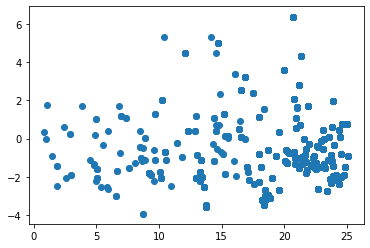

----------------- Linear regression ----------------- 

Y_i = X_i*Beta + e_i
e_i ~ N(0,sigma_{e}^2)

Beta_0 = -0.262
t-statistic = -1.941
p-value = 0.166

Beta_1 = -0.020
t-statistic = -3.201
p-value = 0.055

R2 = 0.002
----------------- End Linear regression ----------------- 



In [162]:
import random
random.seed(10)

dfreg = dfReg.sample(frac=0.2)
if True:
    dfreg = dfreg[(dfreg['STAT_CAUSE_DESCR'] == 'Miscellaneous') |\
    (dfreg['STAT_CAUSE_DESCR'] == 'Lightning') |\
    (dfreg['STAT_CAUSE_DESCR'] == 'Missing/Undefined')]
    dfreg = dfreg[dfreg['STATE'] == 'NV'] #|\
#     (dfreg['STATE'] == 'CA')]
#     dfreg = dfreg[dfreg['FIRE_SIZE_CLASS'] != 'A']
#     dfreg = dfreg[dfreg['FIRE_SIZE_CLASS'] != 'B']
display(dfreg)
display(len(dfreg))
X = np.vstack(( np.ones(len(dfreg)), np.array(dfreg[f'{2}MavgTemp']) )).T
# X = np.vstack((np.ones(len(dfreg)), np.array(dfreg[f'{2}MavgTemp']))).T
# Y = np.array(dfreg['FIRE_SIZE']).reshape((-1, 1))
Y = np.array(dfreg[f'PALMZ']).reshape((-1, 1))
# Y = np.log(Y)
plt.scatter(X[:,1],Y) 
plt.show()
lm = linreg
lm.X = X
lm.Y = Y
lm.fit()
lm.results()

Linear regression save R2 for each state

In [153]:
import random
random.seed(10)

states = dfReg.STATE.unique()
display(states)
R2dict = dict(zip(states.T,np.zeros(len(states)).T))
display(R2dict)

for i in states:
    print(i)
    dfreg = dfReg.sample(frac=0.2)
#     dfreg = dfreg[(dfreg['STAT_CAUSE_DESCR'] == 'Miscellaneous') |\
#                   (dfreg['STAT_CAUSE_DESCR'] == 'Lightning') |\
#                   (dfreg['STAT_CAUSE_DESCR'] == 'Missing/Undefined')]

    dfreg = dfreg[dfreg['STATE'] == i] #|\
#     display(dfreg)
#                   (dfreg['STATE'] == 'NV')] #|\
#                   (dfreg['STATE'] == 'CA')]
#     dfreg = dfreg[dfreg['FIRE_SIZE_CLASS'] != 'A']
#     dfreg = dfreg[dfreg['FIRE_SIZE_CLASS'] != 'B']
    
    display(len(dfreg))
    X = np.vstack(( np.ones(len(dfreg)), np.array(dfreg[f'{2}MavgTemp']), np.array(dfreg[f'{2}MavgPalmZ']) )).T
    # X = np.vstack((np.ones(len(dfreg)), np.array(dfreg[f'{2}MavgTemp']))).T
    # Y = np.array(dfreg['FIRE_SIZE']).reshape((-1, 1))
    Y = np.array(dfreg['COUNTS']).reshape((-1, 1))
    Y = np.log(Y)
#     plt.scatter(X[:,1],Y) 
#     plt.show()
    lm = linreg
    lm.X = X
    lm.Y = Y
    lm.fit()
#     lm.results()
    R2dict[i] = lm.R2
    

array(['AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'IA', 'ID',
       'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO',
       'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH',
       'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT',
       'WA', 'WI', 'WV', 'WY'], dtype=object)

{'AL': 0.0,
 'AR': 0.0,
 'AZ': 0.0,
 'CA': 0.0,
 'CO': 0.0,
 'CT': 0.0,
 'DE': 0.0,
 'FL': 0.0,
 'GA': 0.0,
 'IA': 0.0,
 'ID': 0.0,
 'IL': 0.0,
 'IN': 0.0,
 'KS': 0.0,
 'KY': 0.0,
 'LA': 0.0,
 'MA': 0.0,
 'MD': 0.0,
 'ME': 0.0,
 'MI': 0.0,
 'MN': 0.0,
 'MO': 0.0,
 'MS': 0.0,
 'MT': 0.0,
 'NC': 0.0,
 'ND': 0.0,
 'NE': 0.0,
 'NH': 0.0,
 'NJ': 0.0,
 'NM': 0.0,
 'NV': 0.0,
 'NY': 0.0,
 'OH': 0.0,
 'OK': 0.0,
 'OR': 0.0,
 'PA': 0.0,
 'RI': 0.0,
 'SC': 0.0,
 'SD': 0.0,
 'TN': 0.0,
 'TX': 0.0,
 'UT': 0.0,
 'VA': 0.0,
 'VT': 0.0,
 'WA': 0.0,
 'WI': 0.0,
 'WV': 0.0,
 'WY': 0.0}

AL


13381

AR


6213

AZ


14277

CA


37845

CO


7012

CT


1000

DE


22

FL


18080

GA


33761

IA


830

ID


7475

IL


482

IN


414

KS


1521

KY


5383

LA


6047

MA


544

MD


765

ME


2651

MI


2118

MN


8859

MO


3611

MS


15727

MT


8172

NC


22147

ND


3049

NE


1596

NH


498

NJ


5174

NM


7471

NV


3462

NY


16178

OH


678

OK


8527

OR


12045

PA


1712

RI


92

SC


16285

SD


6260

TN


6274

TX


28465

UT


6110

VA


4480

VT


106

WA


6613

WI


6399

WV


4302

WY


2875

In [180]:
from scipy import stats
errors = pd.DataFrame(lm.errors)
jb = stats.jarque_bera(errors)
print(jb)

Jarque_beraResult(statistic=3772.906089623435, pvalue=0.0)


In [138]:
dfstates = pd.DataFrame(R2dict.items(), columns=['STATE', 'R2'])
import plotly.express as px  # Be sure to import express

fig = px.choropleth(dfstates,  # Input Pandas DataFrame
                    locations="STATE",  # DataFrame column with locations
                    color="R2",  # DataFrame column with color values
                    hover_name="STATE", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State R2', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output

In [115]:
wildCountPlot = dfWild.groupby(['STATE'])['FIRE_SIZE'].count()
wildCountPlot = pd.DataFrame(wildCountPlot)
wildCountPlot = wildCountPlot.rename(columns={'FIRE_SIZE':'COUNTS'})
wildFrac = (wildCountPlot/wildCountPlot.sum()).sort_values(by='COUNTS')
wildFrac = wildFrac.reset_index()

fig = px.choropleth(wildFrac,  # Input Pandas DataFrame
                    locations="STATE",  # DataFrame column with locations
                    color="COUNTS",  # DataFrame column with color values
                    hover_name="STATE", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State fraction of wildfires', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output

In [120]:
wildCountPlot = dfWild.groupby(['STATE'])['FIRE_SIZE'].mean()
wildCountPlot = pd.DataFrame(wildCountPlot).reset_index()
wildCountPlot = wildCountPlot[wildCountPlot.STATE != 'AK']
fig = px.choropleth(wildCountPlot,  # Input Pandas DataFrame
                    locations="STATE",  # DataFrame column with locations
                    color="FIRE_SIZE",  # DataFrame column with color values
                    hover_name="STATE", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State fraction of wildfires', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output

In [137]:
wildCountPlot = dfReg.groupby(['STATE'])['PALMZ'].mean()
wildCountPlot = pd.DataFrame(wildCountPlot).reset_index()
wildCountPlot = wildCountPlot[wildCountPlot.STATE != 'AK']
fig = px.choropleth(wildCountPlot,  # Input Pandas DataFrame
                    locations="STATE",  # DataFrame column with locations
                    color="PALMZ", # DataFrame column with color values
                    hover_name="STATE", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'State fraction of wildfires', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output

STATE             AK        AL        AR        AZ        CA        CO  \
YEAR MONTH                                                               
1992 1      0.000000  0.002498  0.001388  0.004718  0.025534  0.002498   
     2      0.000000  0.003795  0.003655  0.002811  0.007591  0.005201   
     3      0.000000  0.001608  0.002986  0.001608  0.005513  0.003561   
     4      0.002561  0.002305  0.003073  0.032266  0.033163  0.015621   
     5      0.018195  0.001166  0.000700  0.070679  0.156170  0.012946   
...              ...       ...       ...       ...       ...       ...   
2015 8      0.003687  0.013679  0.016653  0.048769  0.110622  0.017961   
     9      0.001630  0.024624  0.030780  0.037661  0.126924  0.014847   
     10     0.000334  0.046562  0.049399  0.025534  0.094292  0.007677   
     11     0.000000  0.025485  0.007282  0.055825  0.079794  0.001517   
     12     0.000639  0.036445  0.019182  0.137468  0.070972  0.000000   

STATE             CT        DC        DE        FL  ...        SD        TN  \
YEAR MONTH                                          ...                       
1992 1      0.002775  0.000000  0.000000  0.161255  ...  0.006106  0.001110   
     2      0.003233  0.000141  0.000000  0.074501  ...  0.004358  0.002530   
     3      0.003216  0.000115  0.000000  0.068229  ...  0.007926  0.000919   
     4      0.008323  0.000000  0.000256  0.063508  ...  0.008707  0.000768   
     5      0.006998  0.000000  0.000117  0.082342  ...  0.007698  0.000583   
...              ...       ...       ...       ...  ...       ...       ...   
2015 8      0.002974  0.000000  0.000238  0.012133  ...  0.013560  0.001665   
     9      0.004345  0.000181  0.000724  0.010320  ...  0.018468  0.003621   
     10     0.001168  0.000000  0.000000  0.015688  ...  0.014019  0.010013   
     11     0.003641  0.000000  0.000000  0.017597  ...  0.014867  0.026092   
     12     0.003197  0.000000  0.000000  0.037084  ...  0.002558  0.012148   

STATE             TX        UT        VA        VT        WA        WI  \
YEAR MONTH                                                               
1992 1      0.013322  0.000000  0.000278  0.000000  0.001110  0.000833   
     2      0.015462  0.000000  0.000843  0.000000  0.000562  0.002109   
     3      0.011831  0.000574  0.001608  0.000000  0.007007  0.007351   
     4      0.004738  0.002561  0.001024  0.000000  0.006786  0.039821   
     5      0.003266  0.005248  0.000350  0.000117  0.021460  0.057733   
...              ...       ...       ...       ...       ...       ...   
2015 8      0.189604  0.014512  0.002022  0.000000  0.054359  0.005353   
     9      0.227413  0.013942  0.003983  0.000362  0.018468  0.003621   
     10     0.225134  0.005174  0.001168  0.000000  0.010514  0.008011   
     11     0.055218  0.000910  0.013956  0.001214  0.002427  0.007282   
     12     0.157289  0.000639  0.001279  0.000000  0.000000  0.001918   

STATE             WV        WY  
YEAR MONTH                      
1992 1      0.004163  0.011657  
     2      0.016306  0.003655  
     3      0.020216  0.003331  
     4      0.019334  0.007170  
     5      0.006415  0.005948  
...              ...       ...  
2015 8      0.000476  0.017842  
     9      0.002535  0.022452  
     10     0.004673  0.006676  
     11     0.069175  0.005158  
     12     0.007033  0.003836  

[288 rows x 52 columns]

STATE,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
YEAR,,,,,,,,,,,,,,,,,,,,,
1992,0.007076,0.001368,0.001883,0.051401,0.159367,0.019448,0.002972,0.000044,0.000044,0.062111,...,0.008150,0.000809,0.017183,0.016065,0.000633,0.000015,0.026098,0.018933,0.010313,0.010975
1993,0.013890,0.002210,0.002436,0.074836,0.133411,0.020068,0.001662,0.000113,0.000016,0.073368,...,0.007066,0.001049,0.023504,0.011454,0.000871,0.000016,0.015906,0.014261,0.013664,0.004339
1994,0.008426,0.045448,0.002199,0.059496,0.113936,0.033112,0.003818,0.000053,0.000026,0.046475,...,0.011612,0.000961,0.011941,0.021895,0.001027,0.000079,0.026621,0.025976,0.013297,0.012099
1995,0.005848,0.059184,0.003358,0.062990,0.103271,0.021225,0.001539,0.000070,0.000070,0.044577,...,0.009304,0.001483,0.023058,0.016104,0.021687,0.000028,0.016972,0.022946,0.017363,0.007415
1996,0.009501,0.053563,0.002964,0.049766,0.121378,0.018591,0.000357,0.000000,0.000000,0.062151,...,0.011102,0.000741,0.037619,0.022045,0.010903,0.000000,0.014436,0.019359,0.008614,0.013655
1997,0.011733,0.042164,0.016924,0.036615,0.129048,0.011749,0.001351,0.000049,0.000081,0.063662,...,0.009878,0.022685,0.012531,0.014028,0.018438,0.000033,0.016257,0.027258,0.011701,0.003173
1998,0.005968,0.052157,0.016908,0.039184,0.100395,0.011189,0.000439,0.000190,0.000000,0.070396,...,0.011935,0.026854,0.029633,0.012769,0.017084,0.000029,0.021603,0.023563,0.014714,0.002896
1999,0.005394,0.050368,0.024887,0.030617,0.099706,0.008460,0.003324,0.000090,0.000022,0.061368,...,0.015767,0.038651,0.019863,0.014346,0.017714,0.000034,0.016506,0.017949,0.021810,0.003413
2000,0.003775,0.064968,0.024508,0.040024,0.072364,0.016792,0.001307,0.000000,0.000010,0.067406,...,0.023554,0.027734,0.027247,0.019260,0.010247,0.000000,0.012716,0.016367,0.011471,0.005922


,FIRE_SIZE
YEAR,
1992,32.364222
1993,35.356208
1994,54.198875
1995,28.676755
1996,79.460604
1997,52.313024
1998,29.414983
1999,68.039342
2000,79.234760


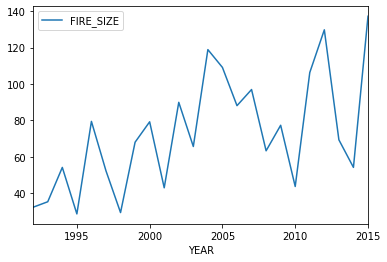

In [48]:
table = pd.pivot_table(wildCount, values='COUNTS', index=['YEAR','MONTH'],
                       columns=['STATE'], aggfunc=np.sum,fill_value=0)
fracCountMonthly = table.div(table.sum(axis=1), axis=0)
display(fracCountMonthly)

table = pd.pivot_table(wildCount, values='COUNTS', index=['YEAR'],
                       columns=['STATE'], aggfunc=np.sum,fill_value=0)
fracCountYearly = table.div(table.sum(axis=1), axis=0)
display(fracCountYearly)

meanSize = pd.pivot_table(dfWild, values='FIRE_SIZE', index=['YEAR'], aggfunc=np.mean, fill_value=0)
display(meanSize)
meanSize.plot()

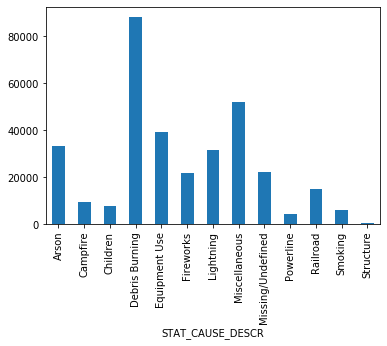

In [182]:
states = dfWild['STATE'].unique()
for i in states:
    dftest = dfWild[dfWild['STATE']==i]
    grouped = dftest['STATE'].groupby([dftest['STAT_CAUSE_DESCR']]).count()
    grouped.plot.bar()


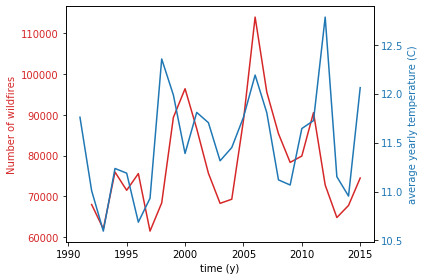

In [121]:
avgtemp = dftemp.groupby([dftemp['Date'].dt.year])['TEMP'].mean()
fig, ax1 = plt.subplots()

wildfires = pd.pivot_table(wildCount, values='COUNTS', index=['YEAR'], aggfunc=np.sum,fill_value=0)
color = 'tab:red'
ax1.set_xlabel('time (y)')
ax1.set_ylabel('Number of wildfires', color=color)
ax1.plot(wildfires, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('average yearly temperature (C)', color=color)  # we already handled the x-label with ax1
ax2.plot(avgtemp, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [226]:
# dfSmall.groupby('FIRE_SIZE_CLASS').STATE.value_counts().unstack().plot.barh()
# plt.show()
# plt.scatter(dfWild['LONGITUDE'], dfWild['LATITUDE'])
# plt.show()

array(['Unnamed: 0', 'OBJECTID', 'FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE',
       'SOURCE_SYSTEM', 'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'MTBS_ID',
       'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE',
       'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE',
       'OWNER_CODE', 'OWNER_DESCR', 'STATE', 'COUNTY', 'FIPS_CODE',
       'FIPS_NAME', 'Shape'], dtype=object)